In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
telecom=pd.read_csv('/Users/luoyayuan/Desktop/Class Slides/654/assignment3/telecom_users.csv')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [3]:
telecom2 = telecom.TotalCharges == ' '
without_na = telecom[~telecom2]

In [4]:
without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5976 non-null   int64  
 1   customerID        5976 non-null   object 
 2   gender            5976 non-null   object 
 3   SeniorCitizen     5976 non-null   int64  
 4   Partner           5976 non-null   object 
 5   Dependents        5976 non-null   object 
 6   tenure            5976 non-null   int64  
 7   PhoneService      5976 non-null   object 
 8   MultipleLines     5976 non-null   object 
 9   InternetService   5976 non-null   object 
 10  OnlineSecurity    5976 non-null   object 
 11  OnlineBackup      5976 non-null   object 
 12  DeviceProtection  5976 non-null   object 
 13  TechSupport       5976 non-null   object 
 14  StreamingTV       5976 non-null   object 
 15  StreamingMovies   5976 non-null   object 
 16  Contract          5976 non-null   object 


In [5]:
without_na['TotalCharges'].astype("float64")

0       1734.65
1       3973.20
2       2869.85
3        238.50
4        119.50
         ...   
5981      95.00
5982    2198.30
5983     306.05
5984    1200.15
5985     457.30
Name: TotalCharges, Length: 5976, dtype: float64

In telecom dataset tenure,monthlycharges,totalcharges these 3 are numerical variables, and the rest of the variables are categorical.

For my categorical input variables, I need to convert them into dummies because dummifying variables enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup. The dummy variables act like 'switches' that turn various parameters on and off in an equation.

In [6]:
without_na['TotalCharges'].describe()

count     5976
unique    5610
top       20.2
freq        10
Name: TotalCharges, dtype: object

In [7]:
pd.set_option('display.max_columns',None)
without_na.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
without_na['Churn'].astype("category")

0        No
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982     No
5983     No
5984    Yes
5985     No
Name: Churn, Length: 5976, dtype: category
Categories (2, object): ['No', 'Yes']

In [9]:
telecom2=pd.get_dummies(without_na,columns=['InternetService','Contract','PaymentMethod','gender','Partner','Dependents',
                                       'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV','StreamingMovies', 'PaperlessBilling'])


The first one shows the quantities whether users churn or not. 4399 users are still staying in the telecom while 1587 of users are churned.
The second one shows the proportion of users' current situation. As we can see, 73% of users are in the telecom. User churn is in 27%.The second time I ran this function, the object returned will contain the relative frequencies of each level for the unique values.

In [10]:
telecom2.head()
telecom2.columns

Index(['Unnamed: 0', 'customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No int

In [11]:
#id_na = telecom2.TotalCharges == ' '
#without_na = telecom2[~id_na]
telecom2.TotalCharges.replace(" ","")

0       1734.65
1        3973.2
2       2869.85
3         238.5
4         119.5
         ...   
5981         95
5982     2198.3
5983     306.05
5984    1200.15
5985      457.3
Name: TotalCharges, Length: 5976, dtype: object

In [12]:
telecom2['Churn'].astype("category")

0        No
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982     No
5983     No
5984    Yes
5985     No
Name: Churn, Length: 5976, dtype: category
Categories (2, object): ['No', 'Yes']

In [13]:
telecom2['Churn'] = telecom2['Churn'].map( {'Yes':1 ,'No':0})

In [14]:
telecom2['Churn'].value_counts()

0    4389
1    1587
Name: Churn, dtype: int64

In [15]:
telecom2['Churn'].value_counts(normalize=True)

0    0.734438
1    0.265562
Name: Churn, dtype: float64

In [16]:
x=telecom2[['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'InternetService_DSL','TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes']]
y=telecom2['Churn']

In [17]:
x.corr()

,SeniorCitizen,tenure,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
SeniorCitizen,1.000000,0.004503,0.219009,-0.107680,0.255842,-0.184457,0.141155,-0.041164,-0.125103,-0.013321,-0.029141,0.170126,-0.149715,0.007322,-0.007322,-0.015346,0.015346,0.213563,-0.213563,-0.009231,0.009231,-0.126118,-0.009231,0.132937,0.185434,-0.184457,-0.037475,0.091739,-0.184457,0.063545,0.093749,-0.184457,0.061556,0.207006,-0.184457,-0.061090,0.052886,-0.184457,0.102486,0.038746,-0.184457,0.116494,-0.155442,0.155442
tenure,0.004503,1.000000,0.255676,0.009399,0.025484,-0.041666,-0.647753,0.199273,0.564137,0.229061,0.236018,-0.202272,-0.230213,-0.003617,0.003617,-0.384269,0.384269,-0.167677,0.167677,-0.009668,0.009668,-0.330257,-0.009668,0.339378,-0.267053,-0.041666,0.333373,-0.310462,-0.041666,0.358826,-0.314264,-0.041666,0.364705,-0.265411,-0.041666,0.330226,-0.248456,-0.041666,0.285228,-0.261314,-0.041666,0.296686,-0.005278,0.005278
MonthlyCharges,0.219009,0.255676,1.000000,-0.162862,0.785723,-0.760743,0.053261,0.005839,-0.067715,0.049261,0.027662,0.269427,-0.379051,0.013417,-0.013417,-0.105204,0.105204,0.113888,-0.113888,-0.251798,0.251798,-0.340016,-0.251798,0.495081,0.350910,-0.760743,0.303377,0.202055,-0.760743,0.445442,0.168858,-0.760743,0.481627,0.315169,-0.760743,0.341577,0.013440,-0.760743,0.628666,0.012344,-0.760743,0.628068,-0.355469,0.355469
InternetService_DSL,-0.107680,0.009399,-0.162862,1.000000,-0.643321,-0.380167,-0.062251,0.045218,0.029197,0.024638,0.050566,-0.104956,0.044120,-0.008207,0.008207,0.007904,-0.007904,-0.051455,0.051455,0.454799,-0.454799,-0.068297,0.454799,-0.204969,0.029612,-0.380167,0.312876,0.163682,-0.380167,0.157377,0.174011,-0.380167,0.146952,0.034501,-0.380167,0.306246,0.301925,-0.380167,0.017055,0.287627,-0.380167,0.032088,0.066162,-0.066162
InternetService_Fiber optic,0.255842,0.025484,0.785723,-0.643321,1.000000,-0.463544,0.239064,-0.075283,-0.206536,-0.015588,-0.051738,0.333538,-0.309204,0.010869,-0.010869,-0.006707,0.006707,0.166520,-0.166520,-0.292582,0.292582,-0.192235,-0.292582,0.370390,0.403989,-0.463544,-0.025563,0.223900,-0.463544,0.166597,0.218560,-0.463544,0.172505,0.395990,-0.463544,-0.016626,0.064188,-0.463544,0.326707,0.073587,-0.463544,0.316561,-0.329999,0.329999
InternetService_No,-0.184457,-0.041666,-0.760743,-0.380167,-0.463544,1.000000,-0.216767,0.038616,0.215725,-0.009683,0.003981,-0.281476,0.322487,-0.003633,0.003633,-0.001045,0.001045,-0.141621,0.141621,-0.172899,0.172899,0.311283,-0.172899,-0.210245,-0.522332,1.000000,-0.331229,-0.459934,1.000000,-0.383408,-0.465437,1.000000,-0.378480,-0.518327,1.000000,-0.334353,-0.426982,1.000000,-0.414434,-0.421789,1.000000,-0.419575,0.322100,-0.322100
Contract_Month-to-month,0.141155,-0.647753,0.053261,-0.062251,0.239064,-0.216767,1.000000,-0.572299,-0.616901,-0.166277,-0.210282,0.327227,0.002370,0.004797,-0.004797,0.285318,-0.285318,0.229486,-0.229486,0.002654,-0.002654,0.088056,0.002654,-0.090534,0.401904,-0.216767,-0.247621,0.335960,-0.216767,-0.162630,0.401713,-0.216767,-0.232555,0.443999,-0.216767,-0.293008,0.299031,-0.216767,-0.117968,0.307457,-0.216767,-0.125321,-0.174109,0.174109
Contract_On

We calculated the correlation matrix above,however, the matrix is hard to see. So we plot the heat map below for better view purpose.

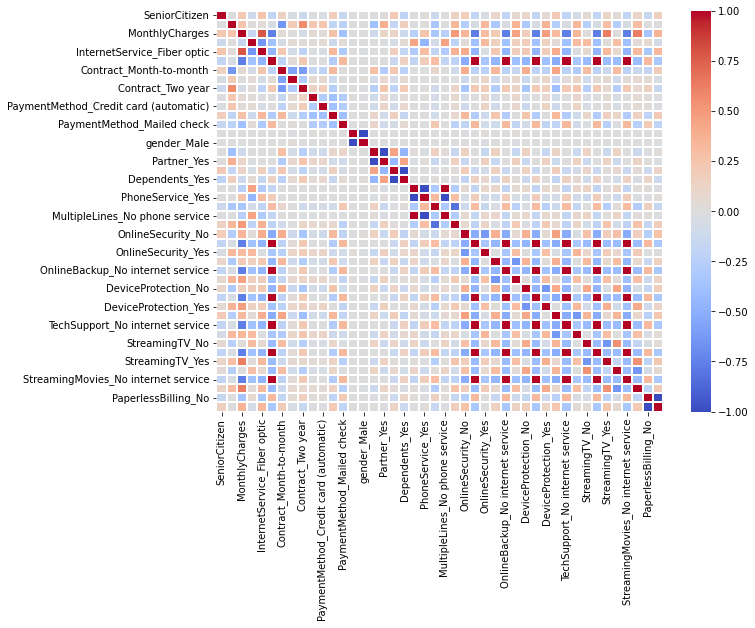

In [18]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,7))
corr =  x.corr()
hm = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="coolwarm", 
                 linewidths=.07)

fig.subplots_adjust(top=0.92)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=654)

Random_state is basically used for reproducing our problem the same every time it is run. I use random_state parameter 654 to determine the randomness of my splits. 654 is the course code of marketing analytics and that is why I use it.This means that if I pass the function array a with random_seed=654, using this 654 seed value will always result in the same train and test data. 

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, x_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
4,0.157101,TotalCharges
1,0.137181,tenure
2,0.133283,MonthlyCharges
7,0.053697,Contract_Month-to-month
12,0.035393,PaymentMethod_Electronic check
25,0.027400,OnlineSecurity_No
34,0.024803,TechSupport_No
5,0.020503,InternetService_Fiber optic
14,0.019698,gender_Female
0,0.019188,SeniorCitizen


In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(91.68, 0.5, 'Actual Result')

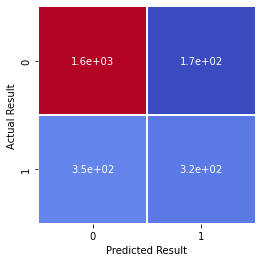

In [23]:
%matplotlib inline
predictions = clf.predict(x_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat,square=True,
            annot=True,
            cbar=False,
            cmap="coolwarm",
            linewidths=.07)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")

In [24]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7816813048933501


In [25]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1720
           1       0.65      0.48      0.55       671

    accuracy                           0.78      2391
   macro avg       0.73      0.69      0.70      2391
weighted avg       0.77      0.78      0.77      2391



In [26]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [12, 16, 20],
    'min_samples_leaf': [4,6,8],
}

In [27]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5) 

CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 8, 'max_features': 12, 'min_samples_leaf': 4, 'n_estimators': 150}


In [58]:
clf=RandomForestClassifier(n_estimators=150, max_depth=8, max_features=12, min_samples_leaf=4, random_state=654)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=12, min_samples_leaf=4,
                       n_estimators=150, random_state=654)

In [59]:
predictions = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7887913007109996


In [60]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1720
           1       0.67      0.49      0.57       671

    accuracy                           0.79      2391
   macro avg       0.74      0.70      0.71      2391
weighted avg       0.78      0.79      0.78      2391



In [61]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, x_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
1,0.163988,tenure
7,0.147308,Contract_Month-to-month
4,0.127145,TotalCharges
2,0.090078,MonthlyCharges
25,0.066140,OnlineSecurity_No
12,0.056261,PaymentMethod_Electronic check
34,0.043317,TechSupport_No
5,0.041772,InternetService_Fiber optic
9,0.025815,Contract_Two year
3,0.014036,InternetService_DSL


Feature importance is a criteria that assign a score to input features based on how useful they are at predicting a target variable.After being fit, the model provides a relative score to for each input feature. We may use these importance scores to select those with high score features while delete lowest scores to improve the performance of the model.
My model's rank of the feature importance from highest to lowest are shown above, with the highest of tenure and lowest of deviceProtection_No internet service.

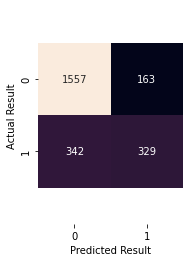

In [62]:
from sklearn.metrics import confusion_matrix
predictions = clf.predict(x_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Sensitivity:",metrics.recall_score(y_test, predictions))
print("Specificity:",metrics.roc_auc_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test, predictions))

Accuracy: 0.7887913007109996
Sensitivity: 0.4903129657228018
Specificity: 0.6977727619311683
Precision: 0.6686991869918699
Balanced Accuracy: 0.6977727619311683


Question I: Compare your model’s accuracy against the training set vs. your model’s accuracy against the test set. How different were these results?

In [64]:
predictions=clf.predict(x_train)
print("Model's Accuracy on test set:", metrics.accuracy_score(y_train, predictions))

Model's Accuracy on test set: 0.8527196652719665


In [65]:
predictions=clf.predict(x_test)
print("Model's Accuracy on test set:", metrics.accuracy_score(y_test, predictions))

Model's Accuracy on test set: 0.7887913007109996


These two numbers are very close to each other, with 0.07 difference in this circumstance.

Question J: Invent a fictional telephone company subscriber. Assign this subscriber a value for each predictor variable in this model, and store the results in a new dataframe. Now, put your subscriber through this model.
a. What did your model predict -- will this subscriber churn?
b. According to your model, what is the probability that this subscriber will churn?

In [66]:
subscriber=pd.DataFrame([{'SeniorCitizen':1, 'tenure':24, 'MonthlyCharges':400,
       'InternetService_DSL':1,'TotalCharges':600,
       'InternetService_Fiber optic':0, 'InternetService_No':0,
       'Contract_Month-to-month':1, 'Contract_One year':1, 'Contract_Two year':0,
       'PaymentMethod_Bank transfer (automatic)':1,
       'PaymentMethod_Credit card (automatic)':0,
       'PaymentMethod_Electronic check':0, 'PaymentMethod_Mailed check':0,
       'gender_Female':1, 'gender_Male':0, 'Partner_No':1, 'Partner_Yes':0,
       'Dependents_No':0, 'Dependents_Yes':1, 'PhoneService_No':0,
       'PhoneService_Yes':1, 'MultipleLines_No':1,
       'MultipleLines_No phone service':0, 'MultipleLines_Yes':0,
       'OnlineSecurity_No':0, 'OnlineSecurity_No internet service':0,
       'OnlineSecurity_Yes':1, 'OnlineBackup_No':0,
       'OnlineBackup_No internet service':0, 'OnlineBackup_Yes':1,
       'DeviceProtection_No':1, 'DeviceProtection_No internet service':0,
       'DeviceProtection_Yes':0, 'TechSupport_No':0,
       'TechSupport_No internet service':0, 'TechSupport_Yes':1, 'StreamingTV_No':0,
       'StreamingTV_No internet service':0, 'StreamingTV_Yes':1,
       'StreamingMovies_No':0, 'StreamingMovies_No internet service':0,
       'StreamingMovies_Yes':1, 'PaperlessBilling_No':0, 'PaperlessBilling_Yes':1}])

In [67]:
subscriber1=clf.predict(subscriber)
subscriber1

array([0])

In [68]:
clf.predict_proba(subscriber).round(4)

array([[0.6881, 0.3119]])

My model predict this subscriber will not churn since the result is 0. According to my model, the probability that this subscriber will churn is 0.312.

Part two: Logistic Regression Model

In [69]:
telecom3=pd.read_csv('/Users/luoyayuan/Desktop/Class Slides/654/assignment3/telecom_users.csv')
telecom3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


What were the top 12 features from your random forest model? List them here.
a. If any numeric variable did not make it into your top 12 list, remove it from the
dataframe now.
b. For any categorical variable, keep the entire variable (all levels) if *any* level of
that variable was in your top 12 list. For any categorical variable that does not have any levels among your top 12 list, remove it entirely.

Top 12 features from random forest model are 
tenure，Contract_Month-to-month，
TotalCharges，MonthlyCharges，Unnamed: 0，OnlineSecurity_No
TechSupport_No，PaymentMethod_Electronic check，InternetService_Fiber optic
PaperlessBilling_Yes，Contract_Two year，PaperlessBilling_No

In [75]:
x1=telecom2[['SeniorCitizen', 'tenure', 'MonthlyCharges','InternetService_DSL','TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes']]

Question M: Determine the correlations among your potential input variables. If any correlations appear to be very high, remove one variable from any highly-correlated pair.

In [76]:
x1.corr()

,SeniorCitizen,tenure,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes
SeniorCitizen,1.000000,0.004503,0.219009,-0.107680,0.255842,-0.184457,0.141155,-0.041164,-0.125103,-0.013321,-0.029141,0.170126,-0.149715,0.185434,-0.184457,-0.037475,0.207006,-0.184457,-0.061090,-0.155442,0.155442
tenure,0.004503,1.000000,0.255676,0.009399,0.025484,-0.041666,-0.647753,0.199273,0.564137,0.229061,0.236018,-0.202272,-0.230213,-0.267053,-0.041666,0.333373,-0.265411,-0.041666,0.330226,-0.005278,0.005278
MonthlyCharges,0.219009,0.255676,1.000000,-0.162862,0.785723,-0.760743,0.053261,0.005839,-0.067715,0.049261,0.027662,0.269427,-0.379051,0.350910,-0.760743,0.303377,0.315169,-0.760743,0.341577,-0.355469,0.355469
InternetService_DSL,-0.107680,0.009399,-0.162862,1.000000,-0.643321,-0.380167,-0.062251,0.045218,0.029197,0.024638,0.050566,-0.104956,0.044120,0.029612,-0.380167,0.312876,0.034501,-0.380167,0.306246,0.066162,-0.066162
InternetService_Fiber optic,0.255842,0.025484,0.785723,-0.643321,1.000000,-0.463544,0.239064,-0.075283,-0.206536,-0.015588,-0.051738,0.333538,-0.309204,0.403989,-0.463544,-0.025563,0.395990,-0.463544,-0.016626,-0.329999,0.329999
InternetService_No,-0.184457,-0.041666,-0.760743,-0.380167,-0.463544,1.000000,-0.216767,0.038616,0.215725,-0.009683,0.003981,-0.281476,0.322487,-0.522332,1.000000,-0.331229,-0.518327,1.000000,-0.334353,0.322100,-0.322100
Contract_Month-to-month,0.141155,-0.647753,0.053261,-0.062251,0.239064,-0.216767,1.000000,-0.572299,-0.616901,-0.166277,-0.210282,0.327227,0.002370,0.401904,-0.216767,-0.247621,0.443999,-0.216767,-0.293008,-0.174109,0.174109
Contract_One year,-0.041164,0.199273,0.005839,0.045218,-0.075283,0.038616,-0.572299,1.000000,-0.292356,0.053730,0.067497,-0.113299,0.008192,-0.124352,0.038616,0.102485,-0.126884,0.038616,0.104862,0.053207,-0.053207
Contract_Two year,-0.125103,0.564137,-0.067715,0.029197,-0.206536,0.215725,-0.616901,-0.292356,1.000000,0.142339,0.180444,-0.272862,-0.010625,-0.349340,0.215725,0.190407,-0.396000,0.215725,0.241054,0.151975,-0.151975
PaymentMethod_Bank transfer (automatic),-0.013321,0.229061,0.049261,0.024638,-0.015588,-0.009683,-0.166277,0.053730,0.142339,1.000000,-0.279109,-0.375910,-0.287318,-0.071824,-0.009683,0.088276,-0.079095,-0.009683,0.095935,0.018405,-0.018405


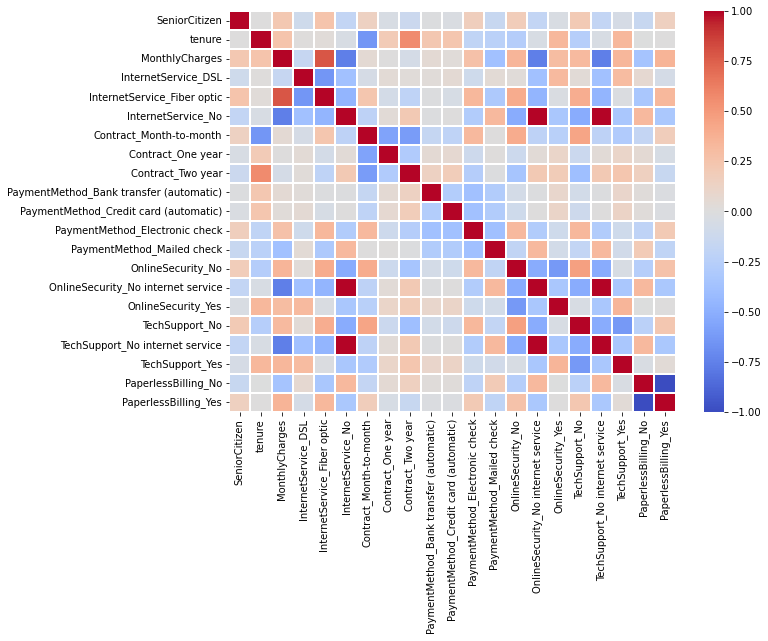

In [77]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,7))
corr =  x1.corr()
hm = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="coolwarm", 
                 linewidths=.07)

fig.subplots_adjust(top=0.92)

In [78]:
x2=telecom2[['SeniorCitizen', 'tenure', 'MonthlyCharges',
               'InternetService_DSL','TotalCharges',
               'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 
       'OnlineSecurity_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes']]
y2=telecom2['Churn']

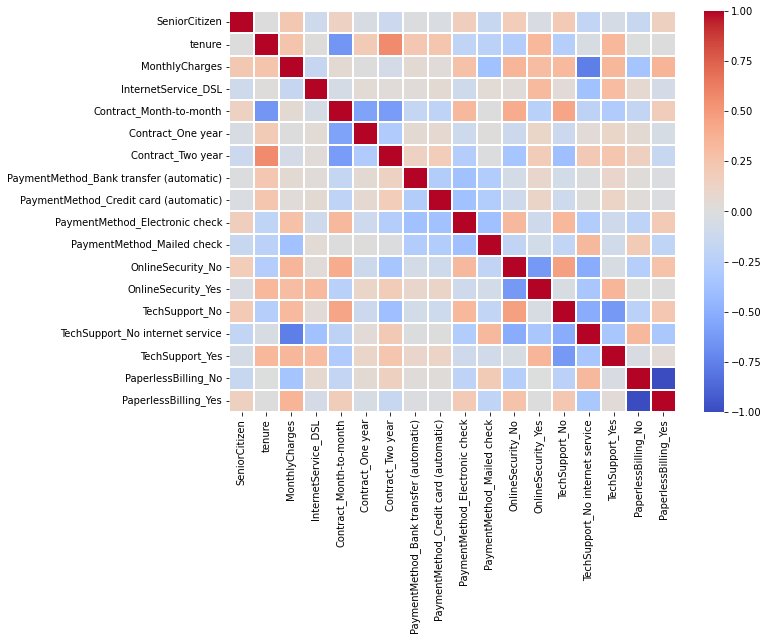

In [79]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,7))
corr =  x2.corr()
hm = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="coolwarm", 
                 linewidths=.07)

fig.subplots_adjust(top=0.92)

Question N: Create a data partition. Use the same random_state value that you used in the previous section.

In [80]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.4,random_state=654)

Question O: Build a logistic regression model using Python, with the outcome variable Churn. Use the remaining variables from the dataset as inputs. Remember to use only your training data to build this model. You can build this either with statsmodels or with scikit-learn.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
x2_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,InternetService_DSL,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,0.154812,32.693166,64.624575,0.340865,0.543096,0.215063,0.241841,0.225105,0.215900,0.324128,0.234868,0.488982,0.290656,0.488703,0.220363,0.290934,0.415342,0.584658
std,0.361776,24.407730,30.281217,0.474066,0.498209,0.410923,0.428258,0.417709,0.411502,0.468114,0.423975,0.499948,0.454128,0.499942,0.414549,0.454257,0.492850,0.492850
min,0.000000,1.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,55.000000,90.150000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
logmodel = LogisticRegression()
logmodel.fit(x2_train, y2_train)
predictions = logmodel.predict(x2_test)
accuracy_score(y2_test, predictions) 

0.7875365955667085

Question P:Show your model’s coefficients.
a. Write a paragraph for company management that indicates the direction, and
strength, of the impact that your numeric variables have on the outcome. For each one, speculate a bit (one sentence is okay) about why it might be impacting the model this way.
b. Now look at the categorical variables and their coefficients. Write a paragraph for company management that indicates the direction, and strength, of the impact that these categorical variables have on the outcome. For each one, speculate a bit (one sentence is okay) about why it might be impacting the model this way.

In [84]:
logmodel.intercept_

array([-0.52237437])

In [85]:
pd.DataFrame(data=logmodel.coef_.transpose(),index=x2_train.columns,columns=['Coef'])

,Coef
SeniorCitizen,0.343349
tenure,-0.055923
MonthlyCharges,0.005324
InternetService_DSL,-0.424852
TotalCharges,0.000281
Contract_Month-to-month,0.380110
Contract_One year,-0.248712
Contract_Two year,-0.644466
PaymentMethod_Bank transfer (automatic),-0.219167
PaymentMethod_Credit card (automatic),-0.364793


MonthlyCharges appears to be the most influencial factors corresponds to the outcome variable.

1 Coefficient -0.055923 indicates that number of tenure negatively correlated to chance of churn. Lower numbers of tenure increases the chance churning users. 
2 Regression coefficient represents the mean change is -0.055923 in each number of tenure for each 1 unit churning when hold all of the other independent variables constant.

1 Coefficient 0.005324 indicates that the amount of MonthlyCharges positively correlated to chance of churn. Higher amount of MonthlyCharges decreases the chance churning users. 
2 Regression coefficient represents the mean change is 0.005324 in each amount of MonthlyCharges for each 1 unit churning when hold all of the other independent variables constant.

1 Coefficient 0.000281 indicates that number of tenure negatively correlated to chance of churn. Higher amount of TotalCharges decreases the chance churning users. 
2 Regression coefficient represents the mean change is 0.000281 in each amount of TotalCharges for each 1 unit churning when hold all of the other independent variables constant.

1 Coefficient 0.343349 indicates that number of SeniorCitizen positively correlated to chance of churn. Higher number of  decreases the chance churning users. 

2 Coefficient -0.424852 indicates that number of InternetService_DSL negatively correlated to chance of churn. Lower number of InternetService_DSL increases the chance churning users. 

3 Coefficient -0.208690 indicates that number of PaymentMethod_Mailed check negatively correlated to chance of churn. Lower number of PaymentMethod_Mailed check increases the chance churning users. 

The rest we can see above.

Question: Assess the performance of your model against the test set. Build a confusion matrix, and answer the following questions about your model. You can use Python functions to answer any of these questions or you can use your confusion matrix to determine the answers in a slightly more manual way. The ‘positive’ class in this model is represented by the “1” outcome.

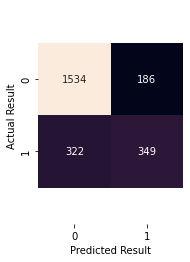

In [86]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [87]:
print("Accuracy:",metrics.accuracy_score(y2_test, predictions))
print("Sensitivity:",metrics.recall_score(y2_test, predictions))
print("Specificity:",metrics.roc_auc_score(y2_test, predictions))
print("Precision:",metrics.precision_score(y2_test, predictions))
print("Balanced Accuracy:",metrics.balanced_accuracy_score(y2_test, predictions))

Accuracy: 0.7875365955667085
Sensitivity: 0.5201192250372578
Specificity: 0.7059898450767684
Precision: 0.6523364485981309
Balanced Accuracy: 0.7059898450767684


Question:Compare your model’s accuracy against the training set vs. accuracy against the test set (just use accuracy only for this).

In [88]:
predictions=logmodel.predict(x2_train)
print("Model's Accuracy on test set:", metrics.accuracy_score(y2_train, predictions))

Model's Accuracy on test set: 0.8050209205020921


In [89]:
predictions=logmodel.predict(x2_test)
print("Model's Accuracy on test set:", metrics.accuracy_score(y2_test, predictions))

Model's Accuracy on test set: 0.7875365955667085


We compare the training and test accuracies to identify and avoid under-fitting and over-fitting. A training accuracy that is subjectively far higher than test accuracy indicates over-fitting. We need to early stop overfitting before modeling.
My logistic regression Model's Accuracy on test set is 0.800557880055788 while Model's Accuracy on training set is 0.7879548306148055. These two values are close to each other with around 0.02. Our model has a tiny chance to overfit our data.

Question:For the subscriber that you invented in the previous section, generate a new dataframe to store this person’s info (you will only need values for the variables that you’ve used in this model – so this dataframe will be quite a bit smaller than the one you built previously). Now, put your subscriber through this model.

In [90]:
subscriber1=pd.DataFrame([{'SeniorCitizen':1, 'tenure':44, 'MonthlyCharges':200,
       'InternetService_DSL':1,'TotalCharges':678,
       'Contract_Month-to-month':1, 'Contract_One year':0, 'Contract_Two year':0,
       'PaymentMethod_Bank transfer (automatic)':0,
       'PaymentMethod_Credit card (automatic)':0,
       'PaymentMethod_Electronic check':1, 'PaymentMethod_Mailed check':0,
       'OnlineSecurity_No':0, 
       'OnlineSecurity_Yes':1, 'TechSupport_No':1,
       'TechSupport_No internet service':0, 'TechSupport_Yes':0,
       'PaperlessBilling_No':1, 'PaperlessBilling_Yes':0}])

In [91]:
subscriber1=logmodel.predict(x2_test)

In [92]:
clf.predict_proba(subscriber).round(4)

array([[0.6881, 0.3119]])

We can use it for both regression and classification problems. It’s easy for use to view the relative importance it assigns to the input features like the results showed above. It is very easy to use because usually the default hyperparameters it uses in the built-in function produce a good prediction result. Understanding the hyperparameters is pretty straightforward.Random forest is a great algorithm to train early in the model development process, to see how it performs. Since it is very simply to use, it's hard for us to build a "bad" one.Random forests can handle a lot of different feature types, like binary, categorical and numerical.

Based on the ranking, we can do more investigations on influential factors related to each crucial feature and create different marketing strategies corresponds to our findings. For example, Tenure is our most important features, However, there are many factors related to reasons why people churn the telecom. Knowing the ranking really help us to figure out right feature to target.Maybe,company can adjust contract time to make users better subscribe the telecom.
Maybe they can specifically reach out to the ones whose predict_proba() numbers fall within a certain range, like 0.31 to 0.69.